In [1]:
# import libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed=RANDOM_STATE)

TEST_SIZE = 0.2
NOISE = 0.2
ALPHA = 0.1
N_SAMPLES = 1000
EPOCHS=200

In [3]:
X, y = datasets.make_moons(n_samples=N_SAMPLES, shuffle=True, noise = NOISE, random_state=24)

X.shape, y.shape

((1000, 2), (1000,))

In [4]:
data_df = pd.DataFrame(X, columns=['A', 'B'])
data_df['target'] = y
data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   target  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [6]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
A,1000.0,0.490841,0.898951,-1.688795,-0.149565,0.500100,1.095048,2.419113
B,1000.0,0.239025,0.540082,-0.955280,-0.205090,0.241163,0.680394,1.612075
target,1000.0,0.500000,0.500250,0.000000,0.000000,0.500000,1.000000,1.000000


<Axes: xlabel='target'>

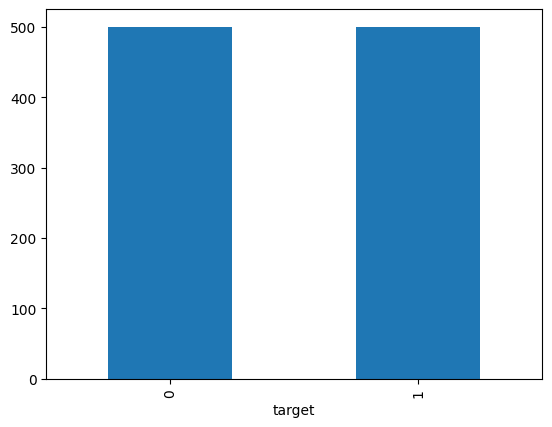

In [7]:
fig, ax = plt.subplots()
data_df['target'].value_counts().plot(ax=ax, kind = 'bar')

In [8]:
data_train, data_test = data_df.to_numpy()[:900], data_df.to_numpy()[900:]

In [9]:
# def fn_sigmoid(z):
  # return 1 if z>=0 else 0

In [10]:
def predict(row, weights):
  z = weights[0]

  for i in range(len(row) - 1):
    z+=weights[i+1]*row[i]

  return 1 if z>=0 else 0

In [11]:
weights = np.array([0.1, 2.0, 1.0])
display(data_df.iloc[0])
predict(data_df.iloc[0].to_numpy(), weights)

,0
A,0.906340
B,0.902676
target,0.000000


1

In [12]:
def train_weights(train, alpha, n_epoch):
  errors = []
  weights = rng.random(train.shape[1])
  m = train.shape[0]

  for epoch in range(n_epoch):
    sum_error = 0.0
    for row in train:
      prediction = predict(row, weights)
      dz = prediction - row[-1]

      sum_error += (prediction - row[-1])**2

      weights[0] = weights[0] - alpha * dz / m

      for i in range(len(row) - 1):
        weights[i+1] = weights[i+1] - alpha * dz * row[i] / m

    errors.append(sum_error/m)
  return weights, errors

In [13]:
weights, error = train_weights(data_train, ALPHA, EPOCHS)
display(weights)


array([-6.44966640e-05,  2.40695264e-04, -3.57032974e-04])

<Axes: >

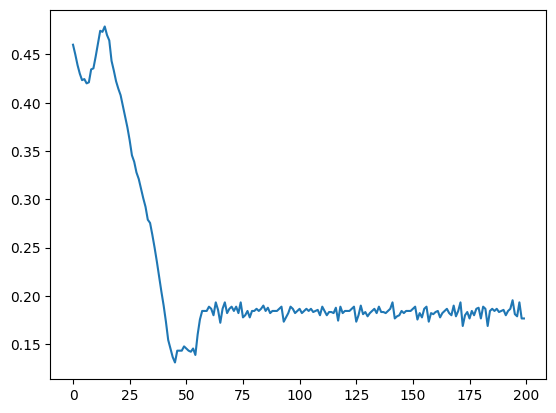

In [14]:
sns.lineplot(x=np.arange(EPOCHS), y=error)